In [1]:
# Plot 2d sigmoid functions for various values of w1, w2.
# i.e. sigmoid(w1*x1 +%w2*x2)
# Based on https://github.com/probml/pmtk3/blob/master/demos/sigmoidplot2D.m
# Duane Rich
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

In [2]:
latexify(fig_height=1.85)

/home/rohit_khoiwal/.local/lib/python3.8/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [3]:
def make_lin_sig(w):
    """
    Create linear function passed through a sigmoid for a given parameter vector w.
    """

    def lin_sig(x):
        return jax.nn.sigmoid(w.dot(x))

    return lin_sig


def num_to_string(num):
    """Formats a number as a string"""
    if int(num) == num:
        return str(int(num))
    else:
        return str(num)


def plot_lingsig(ax, w):

    """
    Given an axes, this will plot the linear sigmoid function associated with w on it.
    """

    Y = jnp.zeros(X1.shape)

    lin_sig = make_lin_sig(jnp.array(w))

    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y = Y.at[i, j].set(lin_sig(jnp.array([X1[i, j], X2[i, j]])))

    ax.plot_surface(X1, X2, Y, cmap="jet", vmin=0, vmax=3, rstride=1, cstride=1, linewidth=0)
    ax.set_zticks([0.0, 0.5, 1.0])
    ax.tick_params(axis="both", labelsize=15)
    ax.set_xlabel("X1", fontsize=15)
    ax.set_ylabel("X2", fontsize=15)
    ax.set_zlabel("$\sigma\ (z)$", fontsize=15)
    ax.set_title("W=({0},{1})".format(num_to_string(w[0]), num_to_string(w[1])), fontsize=15)

    return ax


def det_position(wi):
    # Determine what proportion of the axis limits w is.
    return (wi - lims[0]) / (lims[1] - lims[0])

/home/rohit_khoiwal/.local/lib/python3.8/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


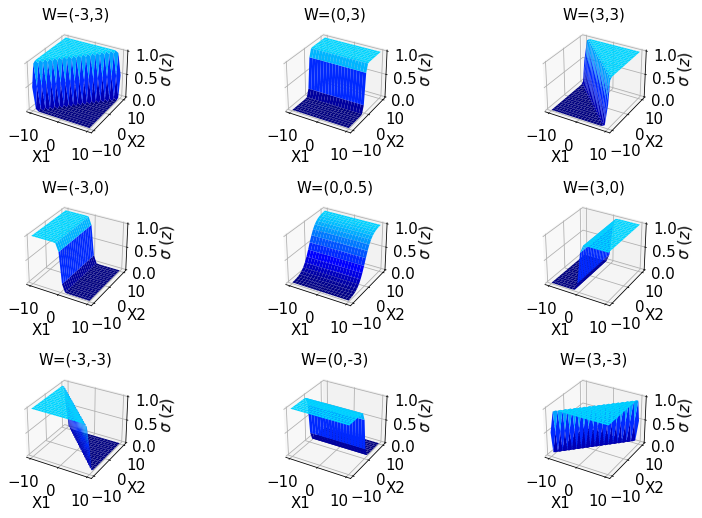

In [4]:
X1, X2 = jnp.meshgrid(jnp.linspace(-10, 10, 20), jnp.linspace(-10, 10, 20))

fig, ax = plt.subplots(figsize=(12, 8))

lims = [-5, 5]

ax.set_ylim(*lims)
ax.set_xlim(*lims)

half_width = 0.1

"""Loop over all coefficient values, adding the associated plot to the graph."""
for w_y in [-3.0, 0.0, 3.0]:
    for w_x in [-3.0, 0.0, 3.0]:
        position = [det_position(w_x), det_position(w_y)]

        """
        These left, bottom, etc... are in reference to the figure (not the axes within it),
        so we need to use fig.tight_layout layer so this closely maps onto the position of
        the main axes.
        """

        left, bottom, width, height = [
            position[0] - half_width,
            position[1] - half_width,
            2 * half_width,
            2 * half_width,
        ]
        if w_y == w_x == 0:
            w = [w_x, 0.5]
        else:
            w = [w_x, w_y]

        curr_ax = fig.add_axes([left, bottom, width, height], projection="3d")
        curr_ax = plot_lingsig(curr_ax, w)

# Add arrows and save
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
edge = (lims[1] - lims[0]) * 0.05
ax.axis("off")
savefig("sigmoidPlot2dColor")
plt.show()